In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.image as mpimg
import plotly.offline as pyo
pyo.init_notebook_mode()
import os
import PIL
import PIL.Image
import pathlib
import cv2

In [3]:
data=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')
data

filename                                               link
0      15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1      39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2      59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3      21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4      53759.jpg  http://assets.myntassets.com/v1/images/style/p...
...          ...                                                ...
44441  17036.jpg  http://assets.myntassets.com/v1/images/style/p...
44442   6461.jpg  http://assets.myntassets.com/v1/images/style/p...
44443  18842.jpg  http://assets.myntassets.com/v1/images/style/p...
44444  46694.jpg  http://assets.myntassets.com/v1/images/style/p...
44445  51623.jpg  http://assets.myntassets.com/assets/images/516...

[44446 rows x 2 columns]

In [4]:
styles_df=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv',on_bad_lines='skip')

In [5]:


DATASET_PATH = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset'

print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


In [6]:
styles_df.shape

(44424, 10)

In [7]:
images_df=pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv')
images_df.shape

(44446, 2)

In [8]:
styles_df.head(10)

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   
6  30805    Men        Apparel     Topwear       Shirts      Green  Summer   
7  26960  Women        Apparel     Topwear       Shirts     Purple  Summer   
8  29114    Men    Accessories       Socks        Socks  Navy Blue  Summer   
9  30039    Men    Accessories     Watches      Watches      Black  Winter   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  
5  2011.0  Casual           Inkfruit Mens Chain Reaction T-shirt  
6  2012.0  Ethnic               Fabindia Men Striped Green Shirt  
7  2012.0  Casual                  Jealous 21 Women Purple Shirt  
8  2012.0  Casual                       Puma Men Pack of 3 Socks  
9  2016.0  Casual                         Skagen Men Black Watch

In [9]:
images_df.head(10)

filename                                               link
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...
5   1855.jpg  http://assets.myntassets.com/v1/images/style/p...
6  30805.jpg  http://assets.myntassets.com/v1/images/style/p...
7  26960.jpg  http://assets.myntassets.com/v1/images/style/p...
8  29114.jpg  http://assets.myntassets.com/v1/images/style/p...
9  30039.jpg  http://assets.myntassets.com/v1/images/style/p...

We have huge category of casual,sports etc

## Image Data

In [10]:
data_dir = pathlib.Path(DATASET_PATH)

images = list(data_dir.glob('*/*.jpg'))

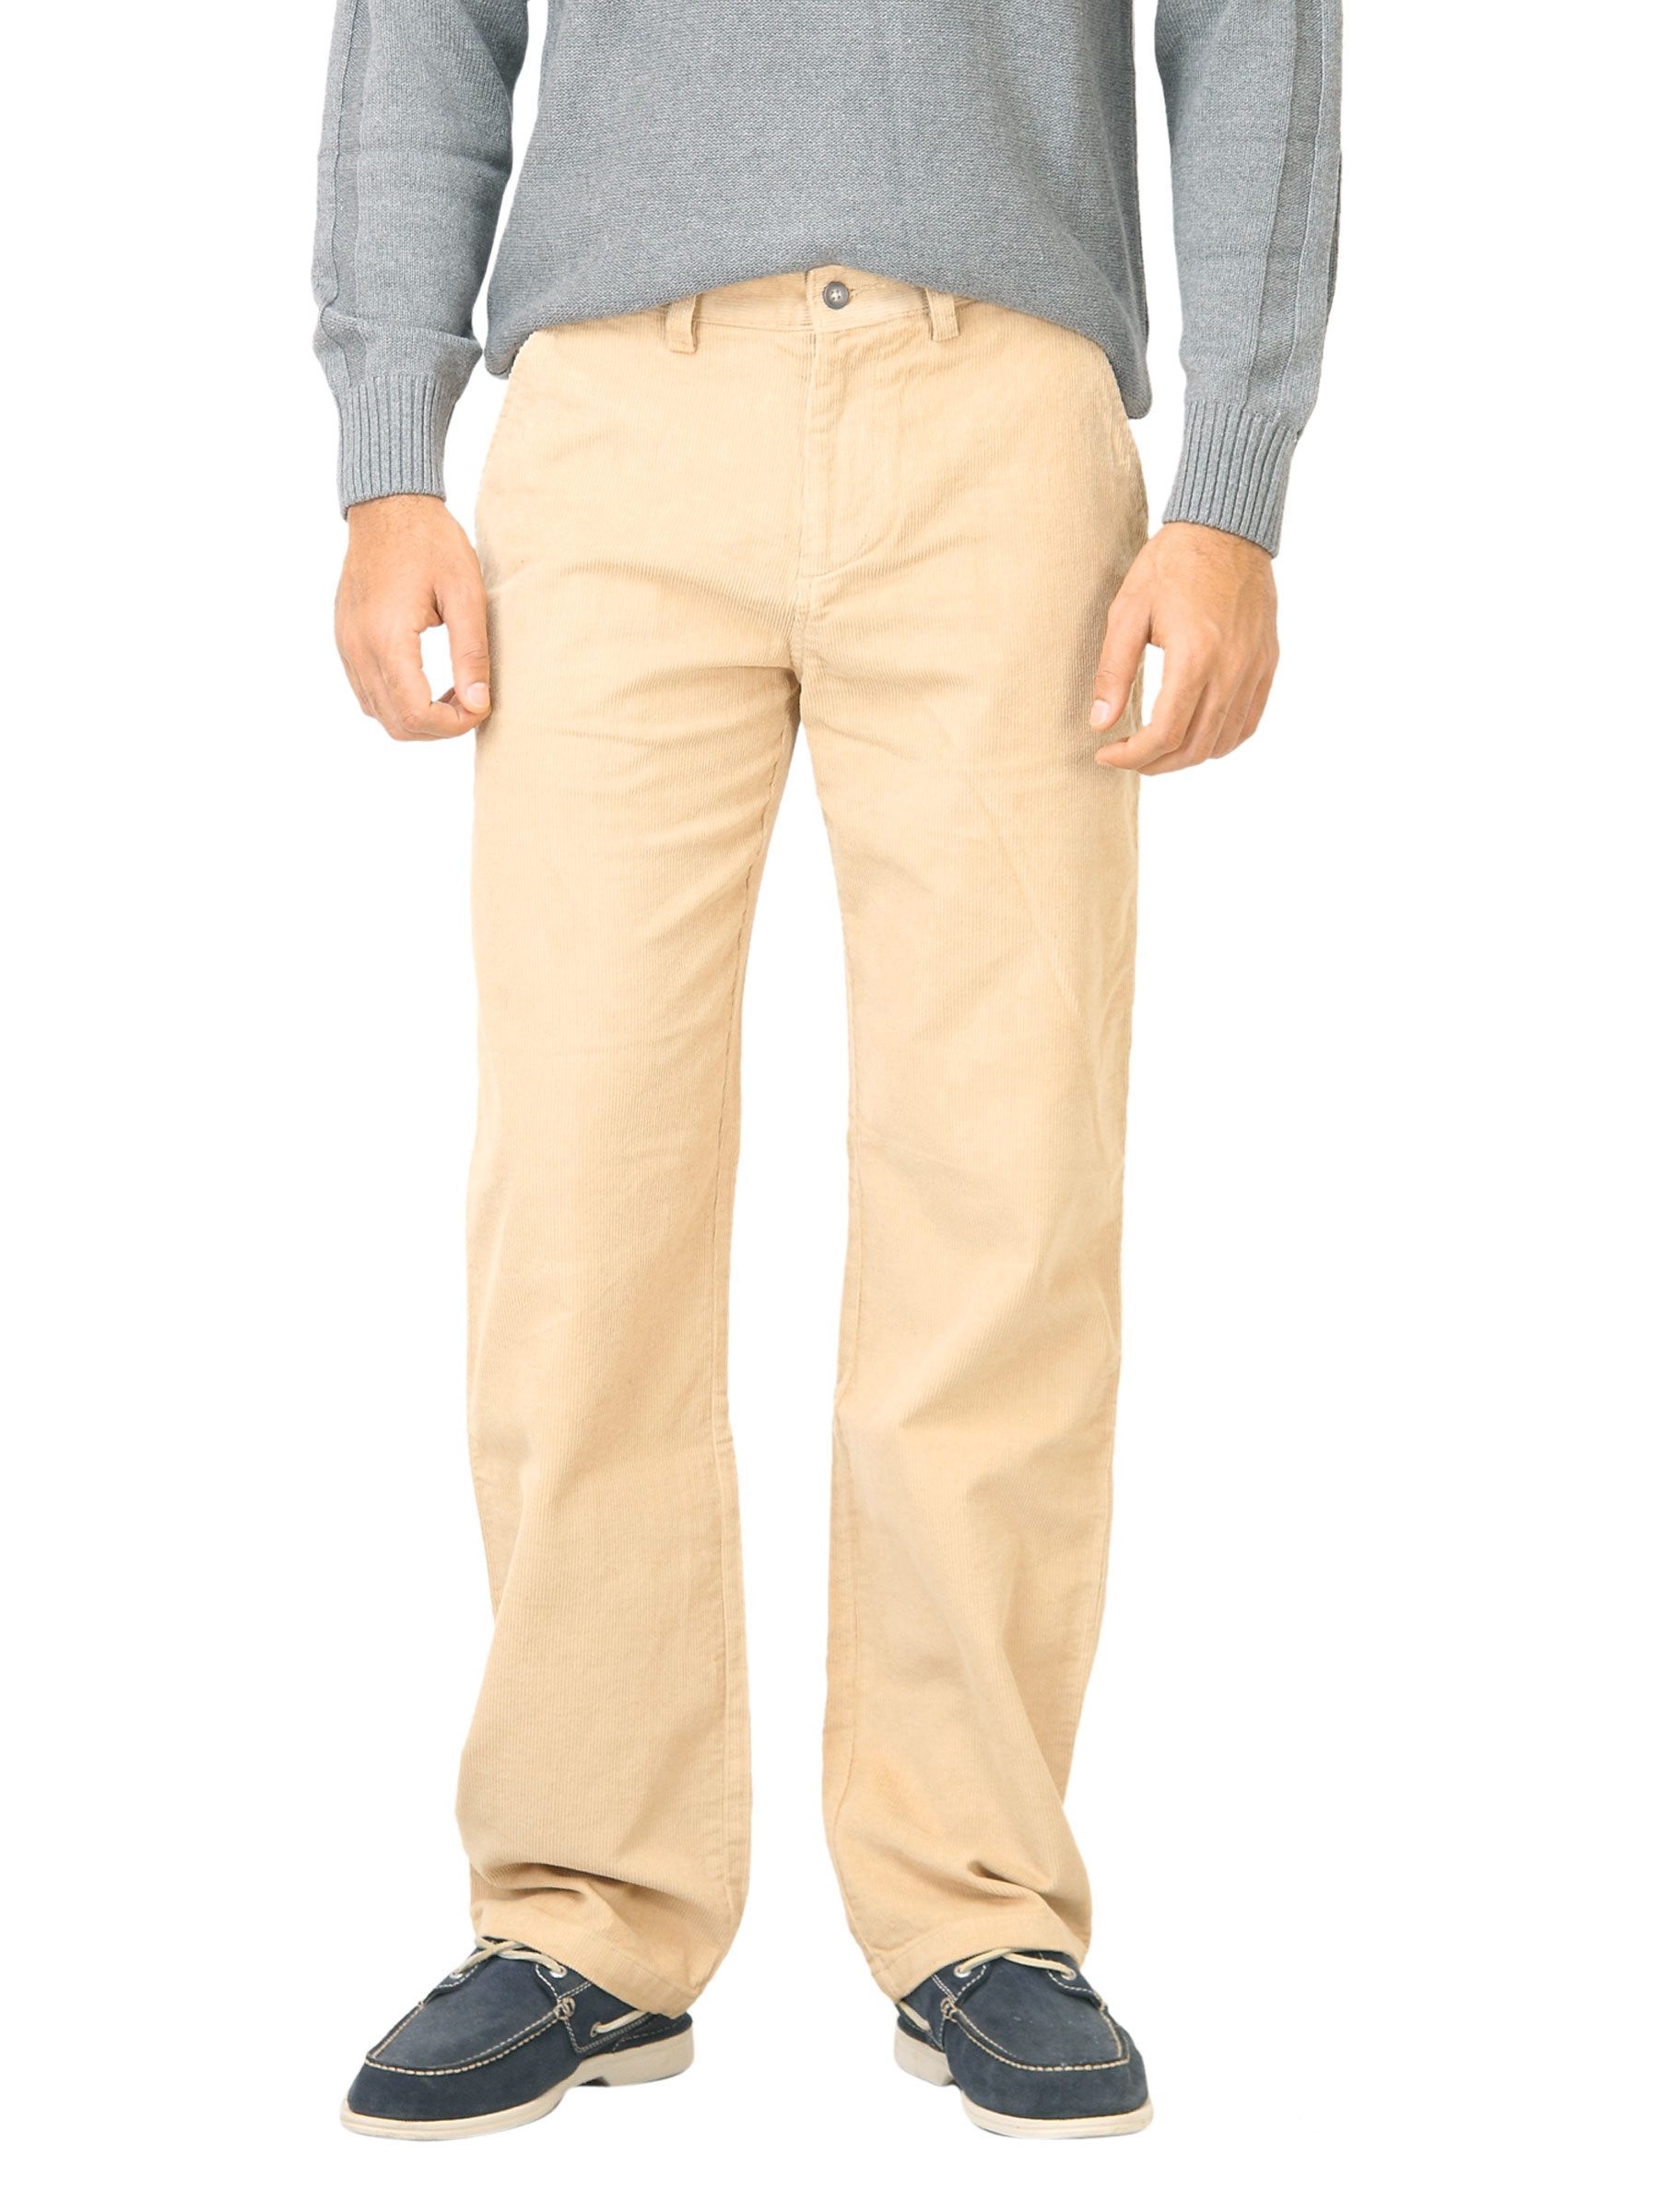

In [12]:
PIL.Image.open(str(images[1000]))

In [13]:
styles_df['image'] = styles_df.apply(lambda row: os.path.join(DATASET_PATH, 'images', str(row['id']) + ".jpg"), axis=1)
styles_df.head()

id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  \
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt   
1  2012.0  Casual             Peter England Men Party Blue Jeans   
2  2016.0  Casual                       Titan Women Silver Watch   
3  2011.0  Casual  Manchester United Men Solid Black Track Pants   
4  2012.0  Casual                          Puma Men Grey T-shirt   

                                               image  
0  /kaggle/input/fashion-product-images-dataset/f...  
1  /kaggle/input/fashion-product-images-dataset/f...  
2  /kaggle/input/fashion-product-images-dataset/f...  
3  /kaggle/input/fashion-product-images-dataset/f...  
4  /kaggle/input/fashion-product-images-dataset/f...

In [14]:
def load_image(img_path, resized_fac = 0.1):
    img_object = plt.imread(img_path)
    w, h, c = img_object.shape
    resized = cv2.resize(img_object, (int(h*resized_fac), int(w*resized_fac)))
    return resized

In [15]:
def plot_grid(image_list, group):
    fig = plt.figure(figsize=(40, 10),facecolor="#D7DBDD")
    plt.suptitle(group, fontsize=40)
    
    samples = len(image_list)
    
    for i in range(samples):
        ax = plt.subplot(1, 4, i + 1)
        plt.imshow(load_image(image_list[i][0]))
        plt.title(image_list[i][1], fontsize=8)
        plt.axis("off")
    plt.show()  

In [16]:
def plot_grouped_images(dataframe, column, samples=4):
    groups = dataframe[column].unique()
    grouped_dataframe = dataframe.groupby(column)
    
    for group in groups:
        
        try:
            image_list = grouped_dataframe.get_group(group).sample(samples)[['image', 'productDisplayName']].values
            plot_grid(image_list, group)
        except:
            image_list = grouped_dataframe.get_group(group).sample(1)[['image', 'productDisplayName']].values
            plot_grid(image_list, group) 

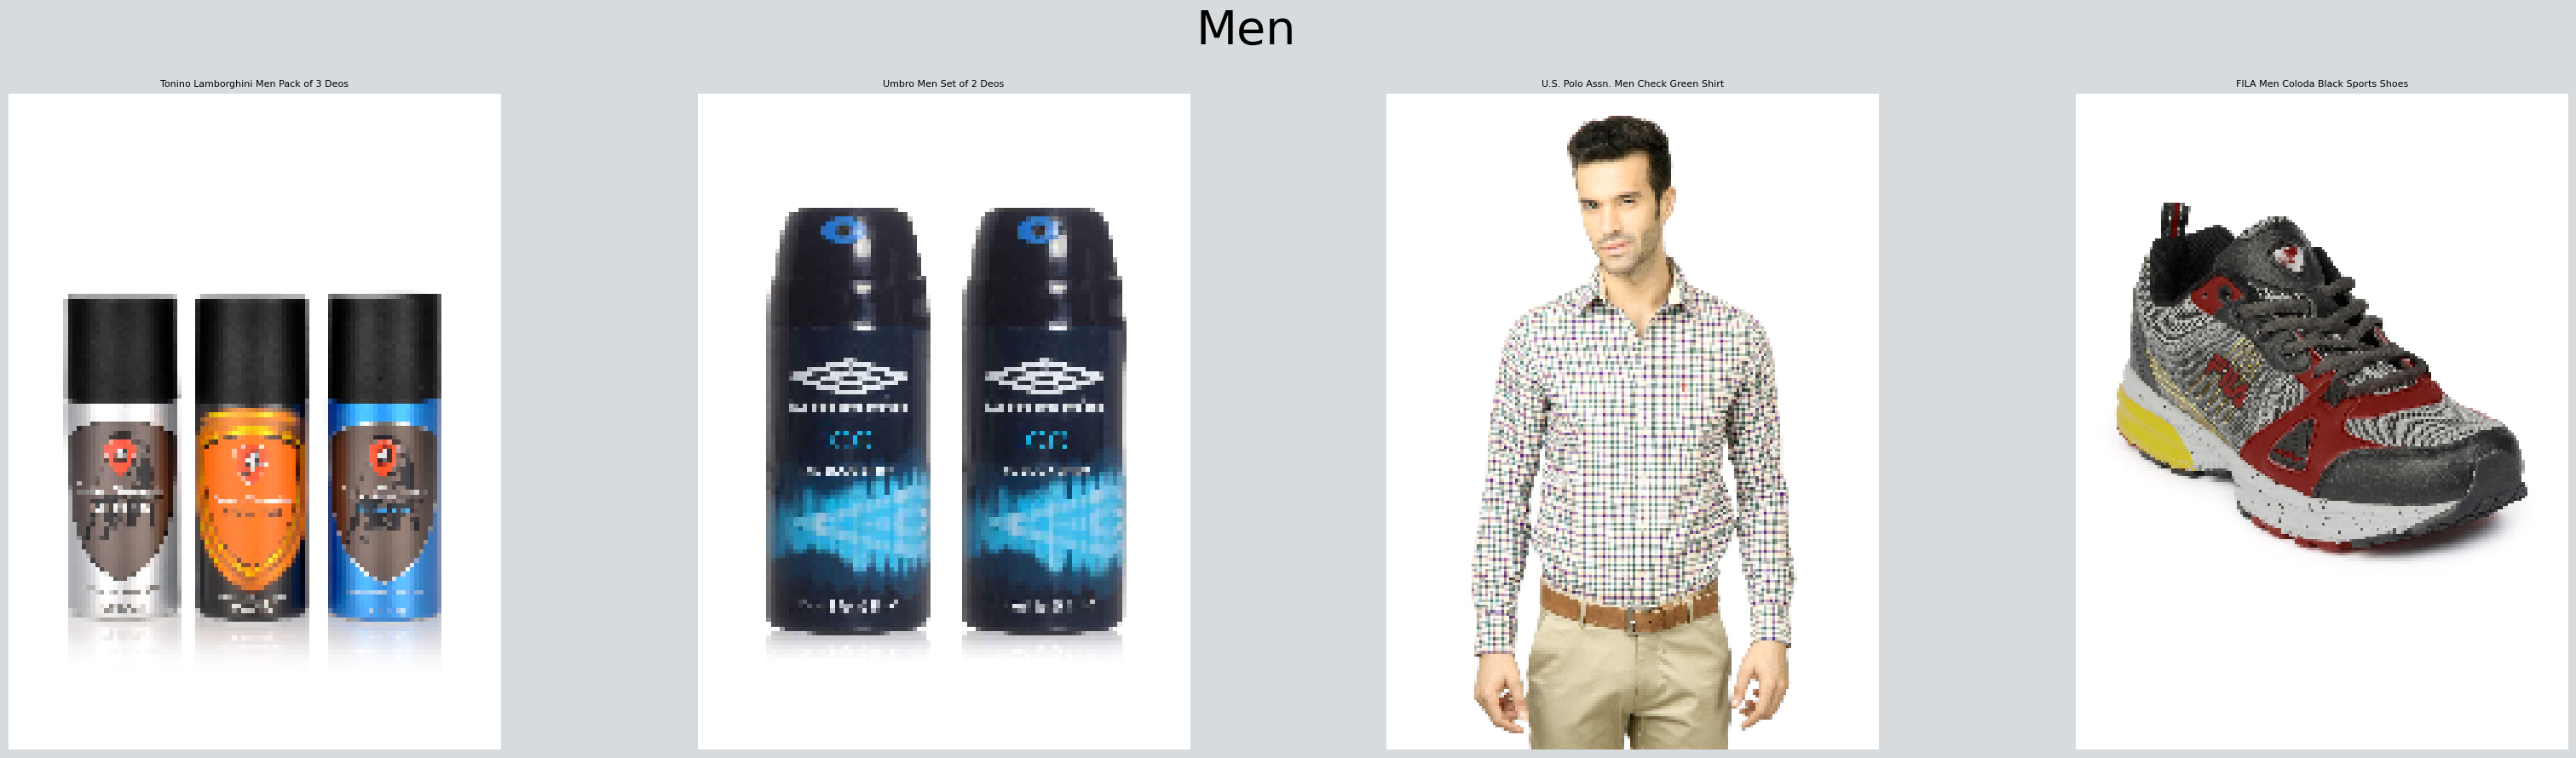

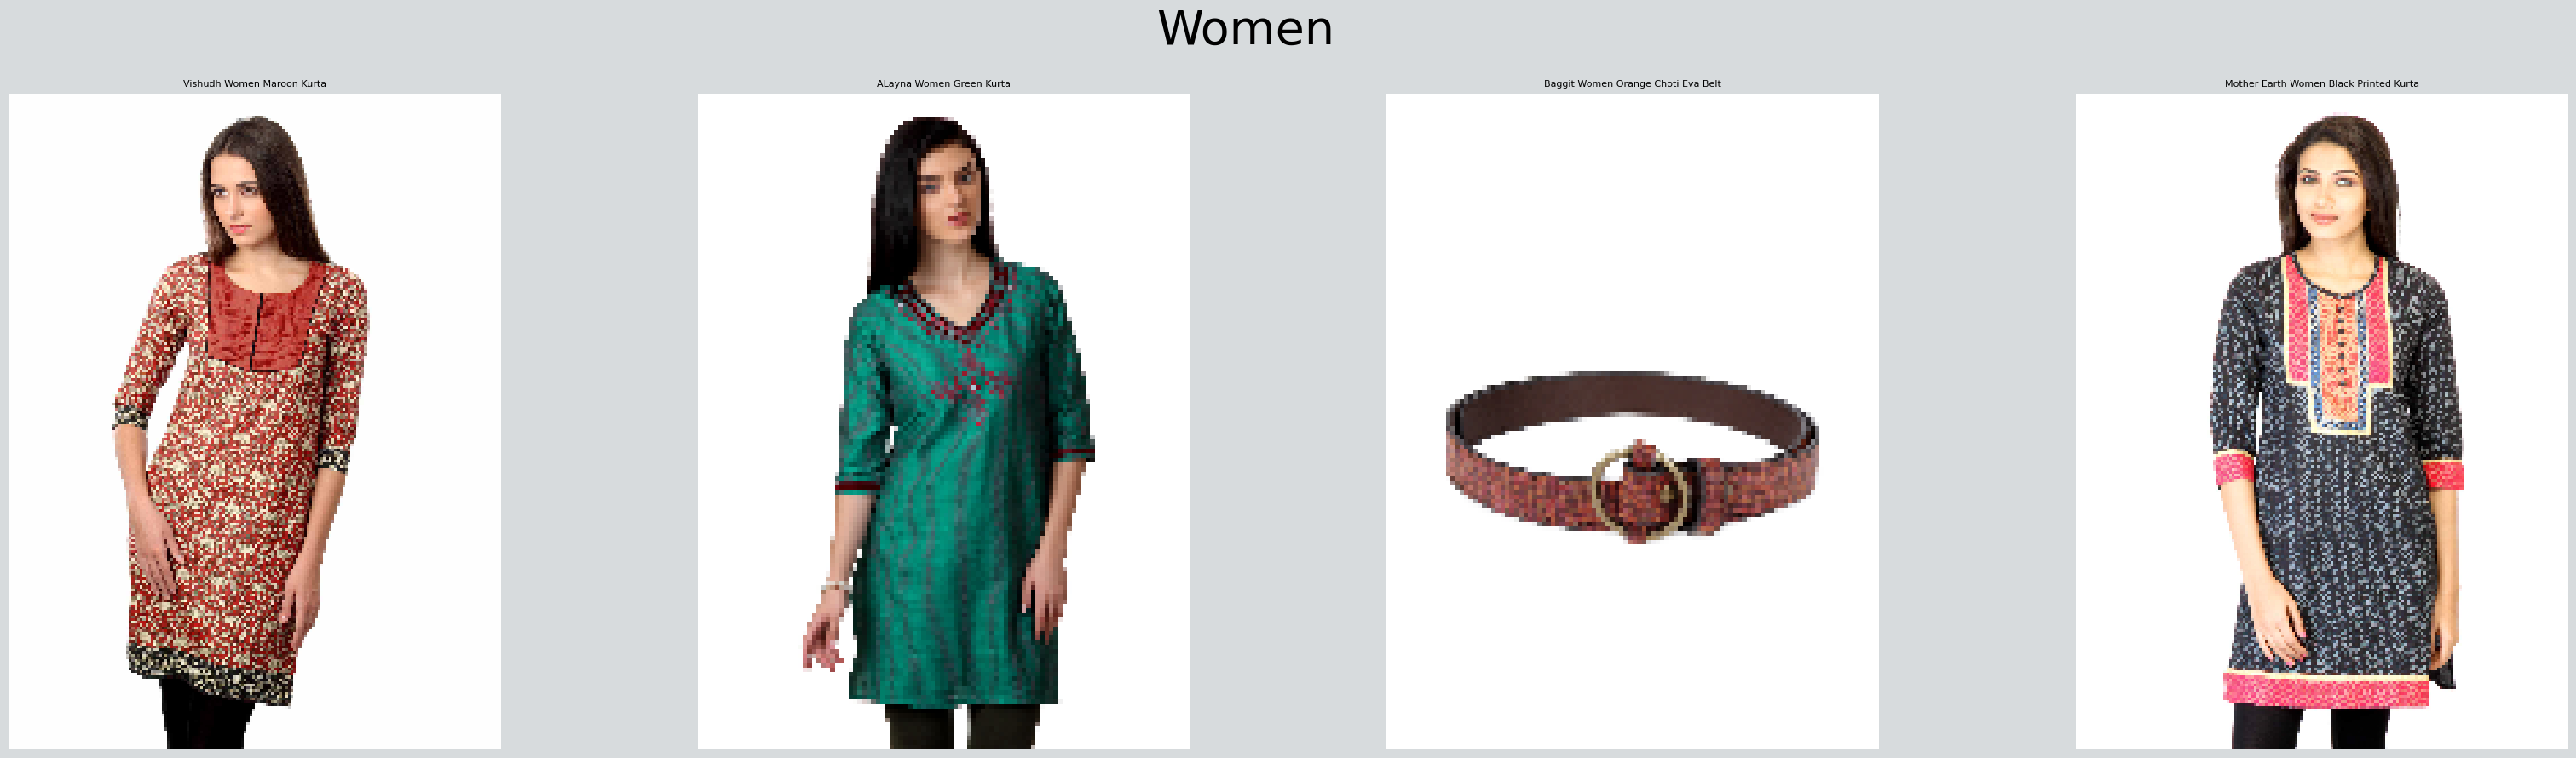

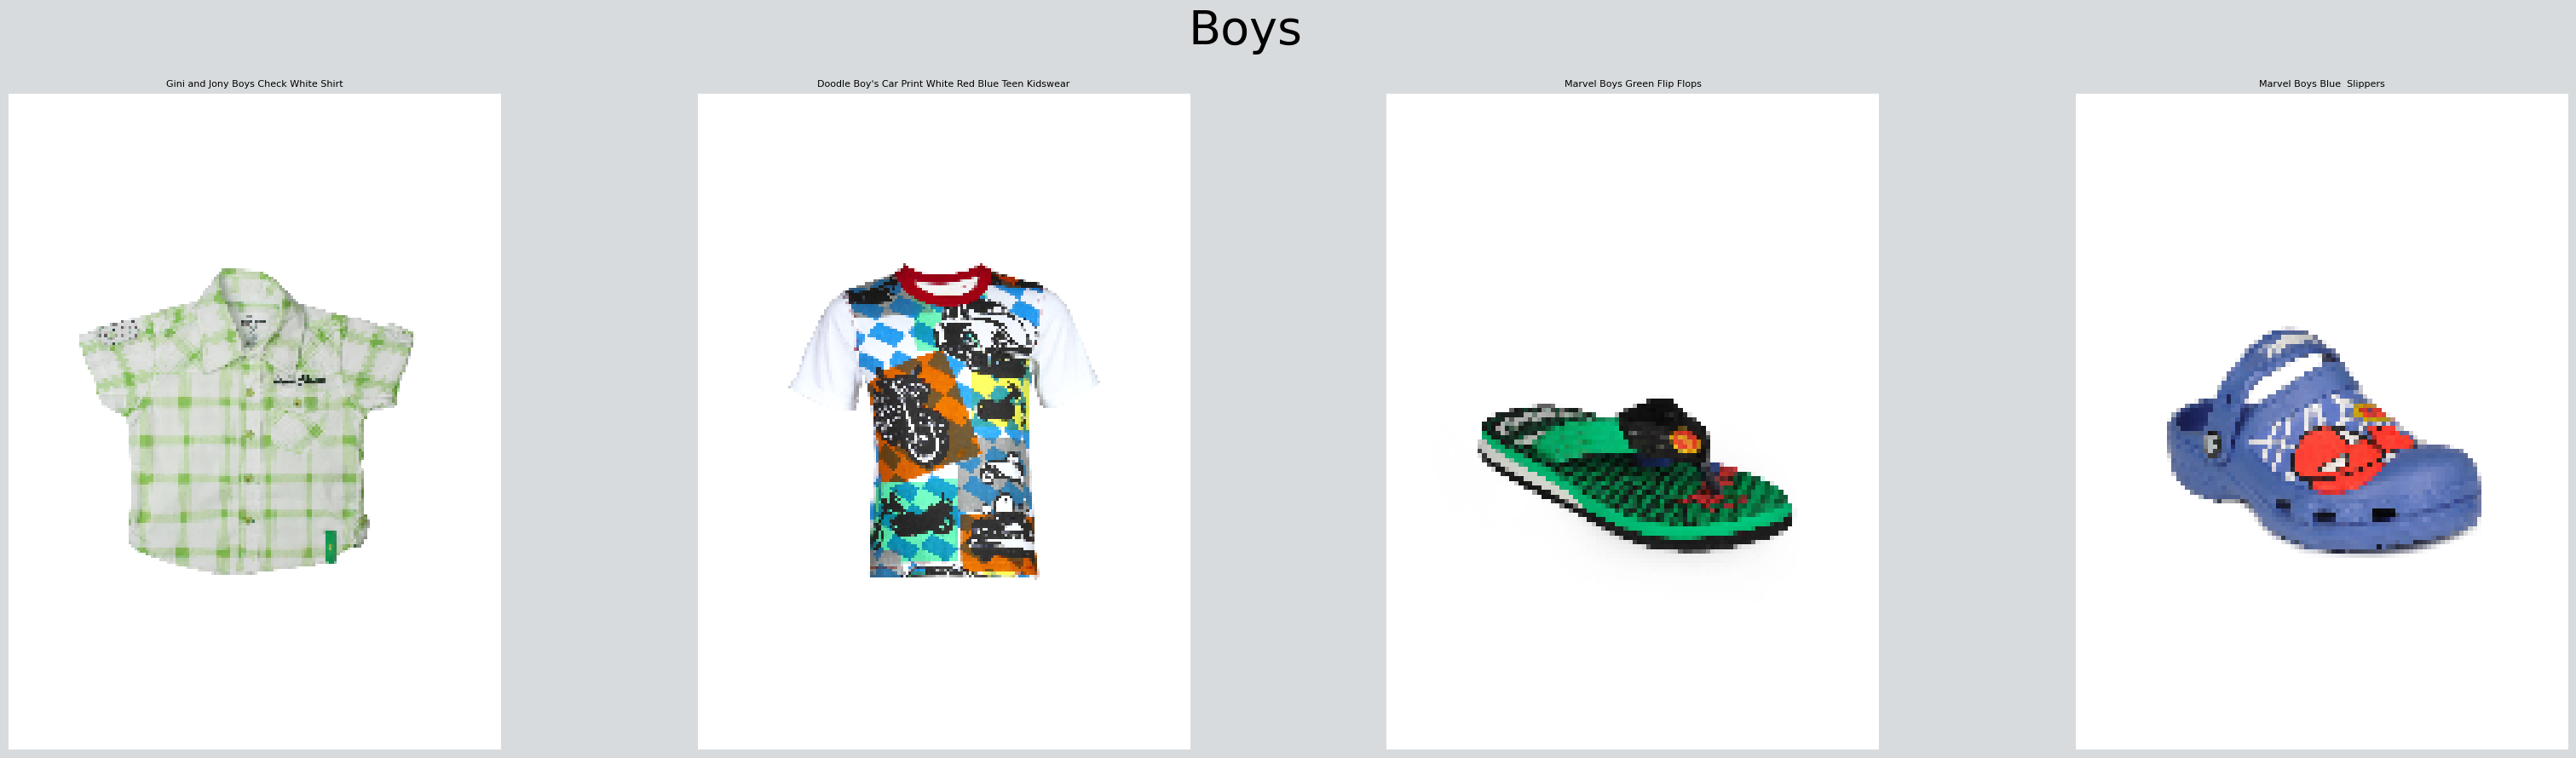

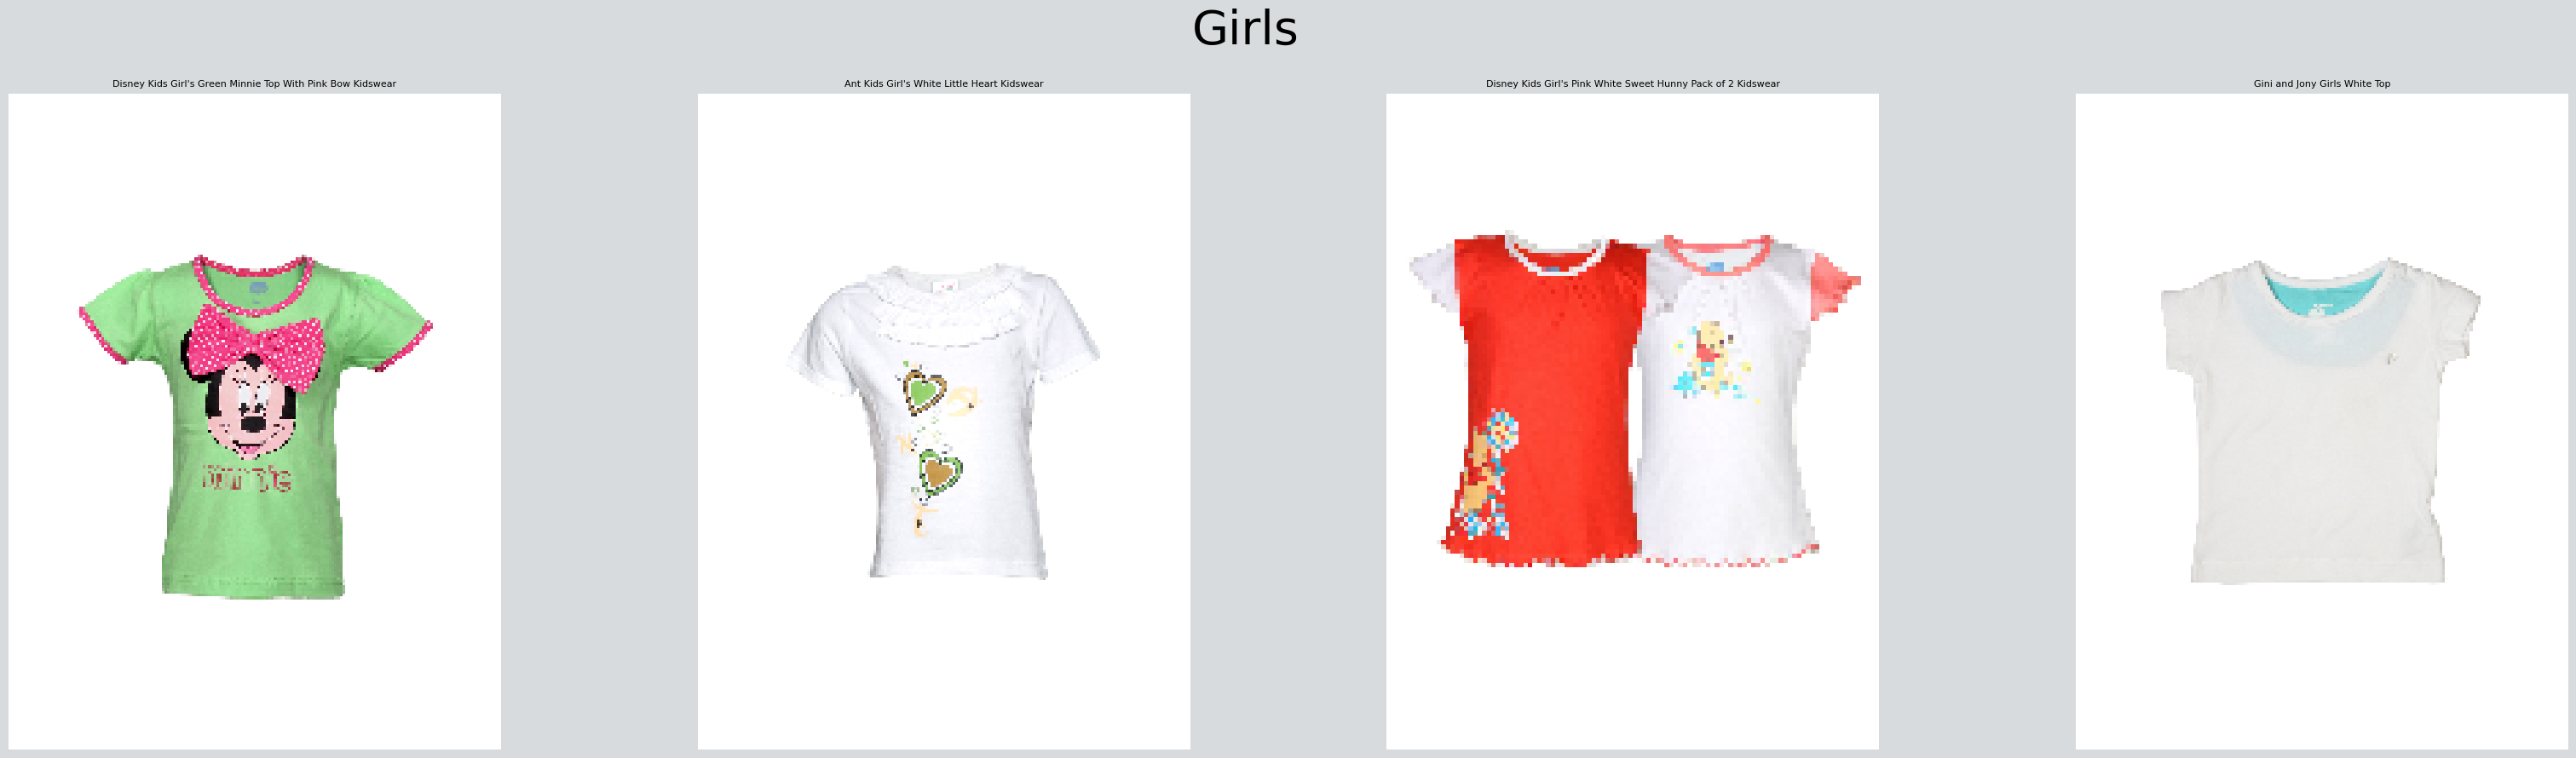

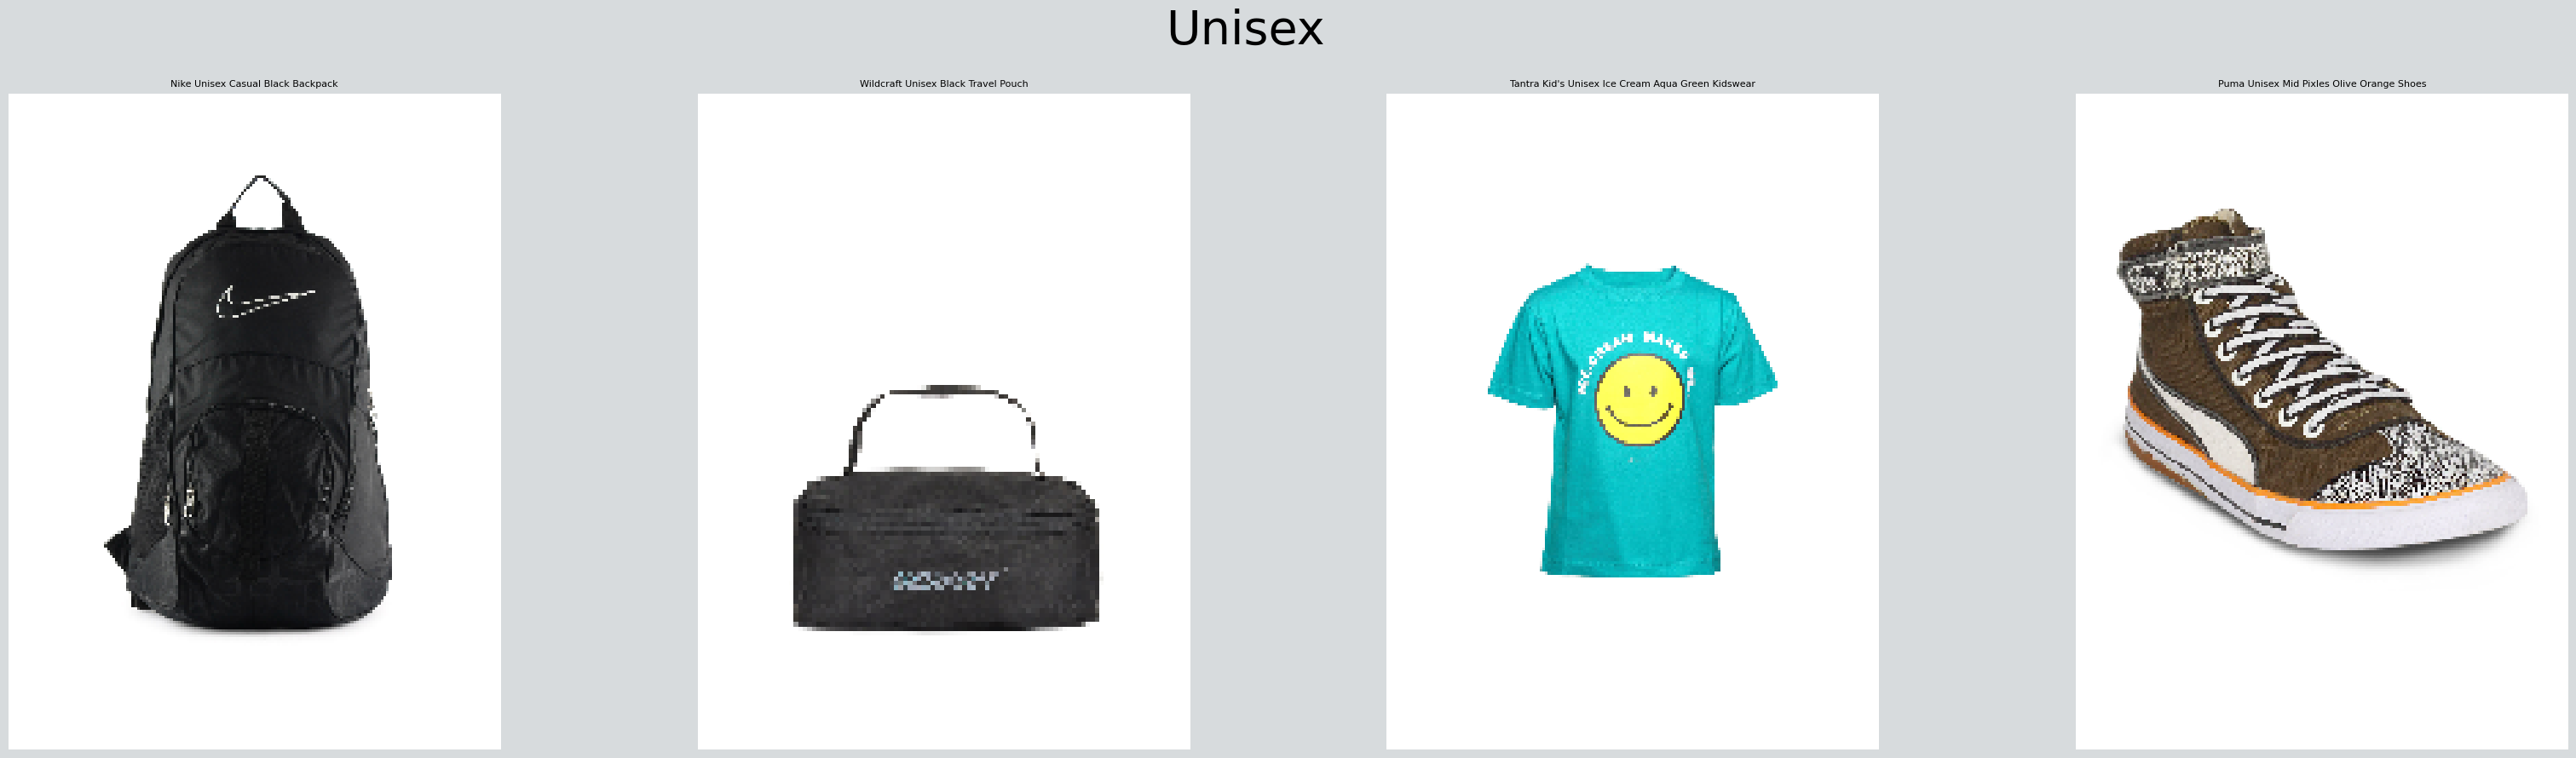

In [17]:
plot_grouped_images(styles_df, 'gender')

## Data Preprocessing 

In [18]:
from keras.callbacks import ModelCheckpoint
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [19]:
def plot_loss_curves(history):
   
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [20]:
import tensorflow as tf
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50V2

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping( monitor="val_loss",
    patience=5,
    mode="min",
)


In [22]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3,)



In [23]:
BATCH_SIZE = 32

train_dataset = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='articleType',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='articleType',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

Found 31094 validated image filenames belonging to 142 classes.


/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1139: UserWarning:

Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.



Found 13325 validated image filenames belonging to 142 classes.


In [24]:
dic_type=train_dataset.class_indices
lis_type=list(dic_type.keys())

In [25]:
num_classes=142
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = res.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


94668760/94668760 [==============================] - 1s 0us/step


In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [27]:
SAVE_DIR = os.path.join("logs", "fit")

# Ensure the directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

In [28]:
res_history = model.fit(train_dataset,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset),
                                  validation_data=val_dataset,
                                  validation_steps=len(val_dataset),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model"),early_stopping]
                                 )

Saving TensorBoard log files to: logs/fit/resnet50v2_model/20240702-152551
972/972 [==============================] - 1856s 2s/step - loss: 1.1376 - accuracy: 0.7330 - val_loss: 0.8967 - val_accuracy: 0.7590


In [36]:
model.save_weights("model.h5")

In [37]:
from IPython.display import FileLink
FileLink(r'model.h5')

/kaggle/working/model.h5

In [38]:
import pickle
filename= "trained_model_type.sav"
a=open(filename,'wb')
pickle.dump(model,a)
a.flush()
a.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
......activation_24
.........vars
......activation_25
.........vars
......activation_26
.........vars
......activation_27
.........vars
......activation_28
.........vars
......activation_29
.........vars
......activation_3
.........vars
......activation_30
.........vars
......activation_31
.........vars
......activation_32
.........vars
......activa

In [39]:
from IPython.display import FileLink
FileLink(r'trained_model_type.sav')

/kaggle/working/trained_model_type.sav

In [40]:
num_classes=142
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
type_model = Model(inputs = res.input, outputs = x)
type_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Restore the weights
type_model.load_weights('/kaggle/working/model.h5')


In [41]:
type_model.evaluate(val_dataset)

417/417 [==============================] - 456s 1s/step - loss: 0.8967 - accuracy: 0.7590


[0.8966953754425049, 0.7590243816375732]

## Gender prediction

In [42]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [43]:
BATCH_SIZE = 32

train_dataset_gender = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='gender',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset_gender = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='gender',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

Found 31094 validated image filenames belonging to 5 classes.
Found 13325 validated image filenames belonging to 5 classes.


In [44]:
print(train_dataset_gender.class_indices)

{'Boys': 0, 'Girls': 1, 'Men': 2, 'Unisex': 3, 'Women': 4}


In [45]:
dic_gender=train_dataset_gender.class_indices
lis_gender=list(dic_gender.keys())

In [46]:
num_classes=5
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model_gender = Model(inputs = res.input, outputs = x)
model_gender.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
res_history_gender = model_gender.fit(train_dataset_gender,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset_gender),
                                  validation_data=val_dataset_gender,
                                  validation_steps=len(val_dataset_gender),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model_gender"),early_stopping]
                                 )

Saving TensorBoard log files to: logs/fit/resnet50v2_model_gender/20240702-161151
972/972 [==============================] - 1511s 2s/step - loss: 0.7159 - accuracy: 0.8426 - val_loss: 0.4659 - val_accuracy: 0.8579


In [49]:
model_gender.save_weights("model_gender.h5")

In [50]:
from IPython.display import FileLink
FileLink(r'trained_model_gender.sav')

/kaggle/working/trained_model_gender.sav

In [51]:
import pickle
filename= "trained_model_gender.sav"
a=open(filename,'wb')
pickle.dump(model_gender,a)
a.flush()
a.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
......activation_24
.........vars
......activation_25
.........vars
......activation_26
.........vars
......activation_27
.........vars
......activation_28
.........vars
......activation_29
.........vars
......activation_3
.........vars
......activation_30
.........vars
......activation_31
.........vars
......activation_32
.........vars
......activa

In [52]:
num_classes=5
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
gender_model = Model(inputs = res.input, outputs = x)
gender_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Restore the weights
gender_model.load_weights('/kaggle/working/model_gender.h5')

## Season Prediction

In [53]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [56]:
BATCH_SIZE = 32

train_dataset_season = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='season',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset_season = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='season',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

Found 31079 validated image filenames belonging to 4 classes.


/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1139: UserWarning:

Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.



Found 13319 validated image filenames belonging to 4 classes.


In [57]:
dic_season=train_dataset_season.class_indices
lis_season=list(dic_season.keys())

In [58]:
num_classes=4
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model_season = Model(inputs = res.input, outputs = x)
model_season.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
res_history_season = model_season.fit(train_dataset_season,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset_season),
                                  validation_data=val_dataset_season,
                                  validation_steps=len(val_dataset_season),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model_season"),early_stopping]
                                 )

Saving TensorBoard log files to: logs/fit/resnet50v2_model_season/20240702-164301
972/972 [==============================] - 1509s 2s/step - loss: 1.2511 - accuracy: 0.6408 - val_loss: 0.8273 - val_accuracy: 0.6518


In [60]:
model_gender.save_weights("model_season.h5")

In [61]:
from IPython.display import FileLink
FileLink(r'model_season.h5')

/kaggle/working/model_season.h5

In [62]:
import pickle
filename= "trained_model_season.sav"
a=open(filename,'wb')
pickle.dump(model_season,a)
a.flush()
a.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
......activation_24
.........vars
......activation_25
.........vars
......activation_26
.........vars
......activation_27
.........vars
......activation_28
.........vars
......activation_29
.........vars
......activation_3
.........vars
......activation_30
.........vars
......activation_31
.........vars
......activation_32
.........vars
......activa

## Colour Prediction

In [63]:
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.3)

In [66]:
BATCH_SIZE = 32

train_dataset_colour = train_datagen.flow_from_dataframe(styles_df, 
                                                    x_col='image', 
                                                    y_col='baseColour',
                                                    target_size=(224,224),
                                                    batch_size=BATCH_SIZE ,
                                                    subset = 'training',
                                                    class_mode='categorical')
val_dataset_colour = train_datagen.flow_from_dataframe(styles_df,  
                                                x_col='image', 
                                                y_col='baseColour',
                                                target_size=(224,224),
                                                batch_size=BATCH_SIZE ,
                                                subset = 'validation',
                                                class_mode='categorical')

Found 31069 validated image filenames belonging to 46 classes.


/opt/conda/lib/python3.7/site-packages/keras/preprocessing/image.py:1139: UserWarning:

Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.



Found 13314 validated image filenames belonging to 46 classes.


In [67]:
dic_colour=train_dataset_colour.class_indices
lis_colour=list(dic_colour.keys())

In [68]:
num_classes=46
res = ResNet50V2(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in res.layers:
     layer.trainable = False
x = Flatten()(res.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model_colour = Model(inputs = res.input, outputs = x)
model_colour.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
res_history_colour = model_colour.fit(train_dataset_colour,
                                  epochs=10,
                                  steps_per_epoch=len(train_dataset_colour),
                                  validation_data=val_dataset_colour,
                                  validation_steps=len(val_dataset_colour),
                                  callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="resnet50v2_model_colour"),early_stopping]
                                 )

Saving TensorBoard log files to: logs/fit/resnet50v2_model_colour/20240702-171714
971/971 [==============================] - 1537s 2s/step - loss: 2.5463 - accuracy: 0.3535 - val_loss: 2.1947 - val_accuracy: 0.3789


In [71]:
model_gender.save_weights("model_colour.h5")

In [72]:
from IPython.display import FileLink
FileLink(r'model_colour.h5')

/kaggle/working/model_colour.h5

In [73]:
import pickle
filename= "trained_model_colour.sav"
a=open(filename,'wb')
pickle.dump(model_colour,a)
a.flush()
a.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
......activation_24
.........vars
......activation_25
.........vars
......activation_26
.........vars
......activation_27
.........vars
......activation_28
.........vars
......activation_29
.........vars
......activation_3
.........vars
......activation_30
.........vars
......activation_31
.........vars
......activation_32
.........vars
......activa

## Testing images 

In [74]:
def load_and_prep_image(filename, img_shape=224):
  
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [75]:
def pred_and_plot(model, filename,class_names):
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]
# Plot the image and predicted value
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
filename='/kaggle/input/screenshots/3.jpg'
pred_and_plot(gender_model, filename,lis_gender)

In [ ]:
pred_and_plot(type_model,filename,lis_type)

In [ ]:
filename_2='/kaggle/input/screenshots/4.png'
pred_and_plot(model_colour, filename_2,lis_gender)

In [ ]:
filename_3='/kaggle/input/screenshots/1.png'
pred_and_plot(model_season, filename_3,lis_gender)